In [19]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
#To upload a file from a computer - Loading stock data
"""
from google.colab import files
uploaded = files.upload()
"""

'\nfrom google.colab import files\nuploaded = files.upload()\n'

In [21]:
#Importing yahoo finance and loading the data
import yfinance as yf

data = yf.download(tickers='TSLA', period='1y', interval='1d')
data.head()

/tmp/ipython-input-21-2525674291.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers='TSLA', period='1y', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-06-24,182.580002,188.800003,182.550003,184.970001,61992100
2024-06-25,187.350006,187.970001,182.009995,184.399994,63678300
2024-06-26,196.369995,197.759995,186.360001,186.539993,95737100
2024-06-27,197.419998,198.720001,194.050003,195.169998,72746500
2024-06-28,197.880005,203.199997,195.259995,199.550003,95438100


In [22]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-06-16,329.130005,332.049988,326.410004,331.290009,83925900
2025-06-17,316.350006,327.260010,314.739990,326.089996,88282700
2025-06-18,322.049988,329.320007,315.450012,317.309998,95137700
2025-06-20,322.160004,332.359985,317.779999,327.950012,108688000
2025-06-23,348.679993,357.540009,327.480011,327.540009,188609800


In [23]:
data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-06-24,182.580002,188.800003,182.550003,184.970001,61992100
2024-06-25,187.350006,187.970001,182.009995,184.399994,63678300
2024-06-26,196.369995,197.759995,186.360001,186.539993,95737100
2024-06-27,197.419998,198.720001,194.050003,195.169998,72746500
2024-06-28,197.880005,203.199997,195.259995,199.550003,95438100
...,...,...,...,...,...
2025-06-16,329.130005,332.049988,326.410004,331.290009,83925900
2025-06-17,316.350006,327.260010,314.739990,326.089996,88282700


In [45]:
data.info

<bound method DataFrame.info of Price            Close        High         Low        Open     Volume  \
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA   
Date                                                                    
2024-06-24  182.580002  188.800003  182.550003  184.970001   61992100   
2024-06-25  187.350006  187.970001  182.009995  184.399994   63678300   
2024-06-26  196.369995  197.759995  186.360001  186.539993   95737100   
2024-06-27  197.419998  198.720001  194.050003  195.169998   72746500   
2024-06-28  197.880005  203.199997  195.259995  199.550003   95438100   
...                ...         ...         ...         ...        ...   
2025-06-16  329.130005  332.049988  326.410004  331.290009   83925900   
2025-06-17  316.350006  327.260010  314.739990  326.089996   88282700   
2025-06-18  322.049988  329.320007  315.450012  317.309998   95137700   
2025-06-20  322.160004  332.359985  317.779999  327.950012  108688000   
2025-06-23  348.679993  357.540009  327.480011  327.540009  188609800   

Price            Short      Medium        Long  
Ticker                                          
Date                                            
2024-06-24  182.580002  182.580002  182.580002  
2024-06-25  184.170003  182.946925  182.767061  
2024-06-26  188.236667  183.979469  183.300509  
2024-06-27  191.297778  185.013356  183.854215  
2024-06-28  193.491853  186.003098  184.404246  
...                ...         ...         ...  
2025-06-16  324.065119  321.512472  312.157497  
2025-06-17  321.493415  321.115360  312.321909  
2025-06-18  321.678939  321.187254  312.703402  
2025-06-20  321.839294  321.262081  313.074250  
2025-06-23  330.786194  323.371151  314.470553  

[250 rows x 8 columns]>

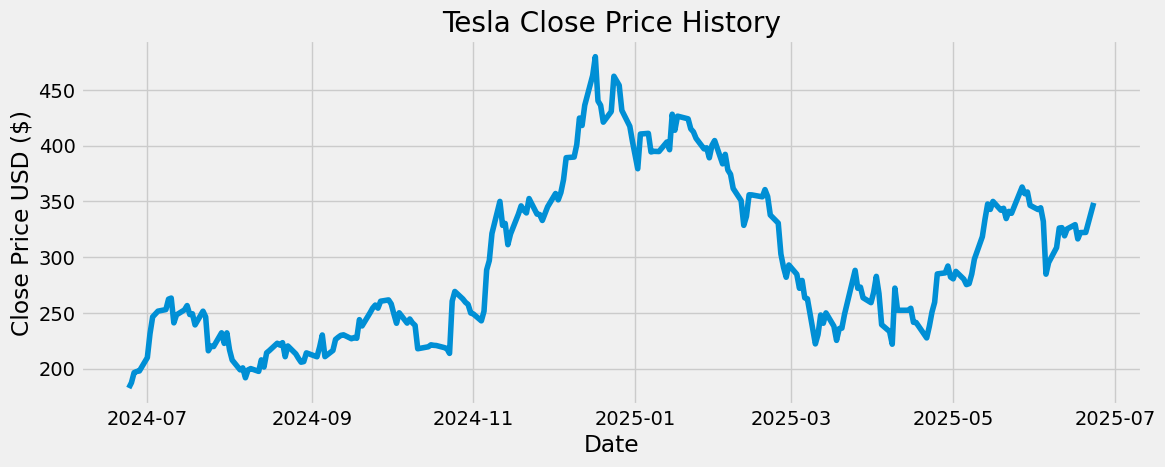

In [24]:
#Plot the close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(data['Close'])
plt.title('Tesla Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [25]:
#Calculating 3 moving averages
#Short/Fast moving exponential average
ShortEMA = data.Close.ewm(span=5, adjust=False).mean()

#Middle/Medium moving exponential average
MediumEMA = data.Close.ewm(span=25, adjust=False).mean()

#Long/Slow moving exponential average
LongEMA = data.Close.ewm(span=50, adjust=False).mean()


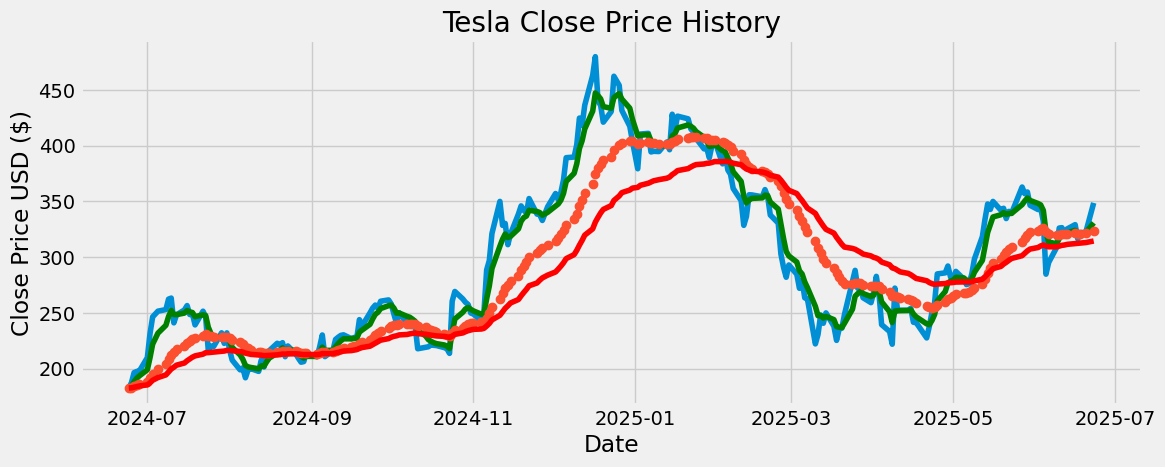

In [26]:
#Visualize close proce and exponential moving averages
plt.figure(figsize=(12.2, 4.5))
plt.plot(data['Close'])
plt.plot(ShortEMA, 'g')
plt.plot(MediumEMA, 'o')
plt.plot(LongEMA, 'r')
plt.title('Tesla Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [27]:
#Add exponential moving averages
data['Short'] = ShortEMA
data['Medium'] = MediumEMA
data['Long'] = LongEMA

data

Price,Close,High,Low,Open,Volume,Short,Medium,Long
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,
2024-06-24,182.580002,188.800003,182.550003,184.970001,61992100,182.580002,182.580002,182.580002
2024-06-25,187.350006,187.970001,182.009995,184.399994,63678300,184.170003,182.946925,182.767061
2024-06-26,196.369995,197.759995,186.360001,186.539993,95737100,188.236667,183.979469,183.300509
2024-06-27,197.419998,198.720001,194.050003,195.169998,72746500,191.297778,185.013356,183.854215
2024-06-28,197.880005,203.199997,195.259995,199.550003,95438100,193.491853,186.003098,184.404246
...,...,...,...,...,...,...,...,...
2025-06-16,329.130005,332.049988,326.410004,331.290009,83925900,324.065119,321.512472,312.157497
2025-06-17,316.350006,327.260010,314.739990,326.089996,88282700,321.493415,321.115360,312.321909


In [47]:
#Create function to buy/sell stock
def buy_sell(data):

  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Medium'].iloc[i] < data['Long'].iloc[i] and data['Short'].iloc[i] < data['Medium'].iloc[i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'].iloc[i])
      sell_list.append(np.nan)
      flag_short = True

    elif flag_short == True and data['Short'].iloc[i] > data['Medium'].iloc[i]:
      buy_list.append(np.nan)
      sell_list.append(data['Close'].iloc[i])
      flag_short = False

    elif data['Medium'].iloc[i] > data['Long'].iloc[i] and data['Short'].iloc[i] > data['Medium'].iloc[i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'].iloc[i])
      sell_list.append(np.nan)
      flag_long = True

    elif flag_long == True and data['Short'].iloc[i] < data['Medium'].iloc[i]:
      buy_list.append(np.nan)
      sell_list.append(data['Close'].iloc[i])
      flag_long = False

    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)

In [48]:
data['Buy'] = buy_sell(data)[0]
data['Sell'] = buy_sell(data)[1]

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  offsets = np.asanyarray(offsets, float)


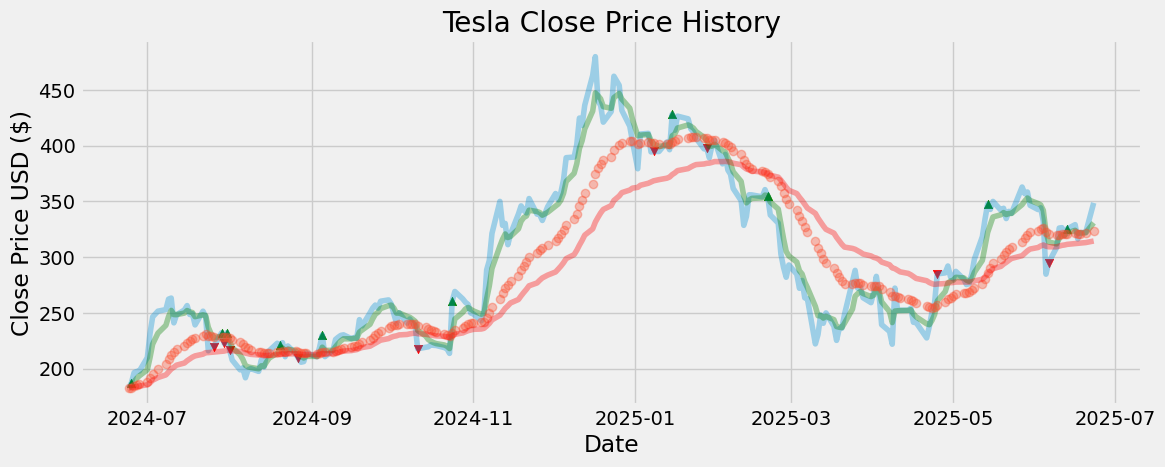

In [50]:
#Visually show buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.plot(data['Close'], alpha=0.35)
plt.plot(ShortEMA, 'g', alpha=0.35)
plt.plot(MediumEMA, 'o', alpha=0.35)
plt.plot(LongEMA, 'r', alpha=0.35)
plt.scatter(data.index, data['Buy'], label='Buy', marker='^', color='green', alpha =1)
plt.scatter(data.index, data['Sell'], label='Sell', marker='v', color='red', alpha =1)
plt.title('Tesla Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()